In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
# Load the dataset CIFAR-10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

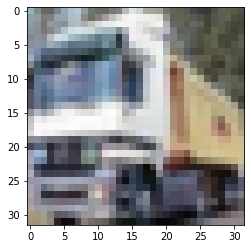

In [7]:
# Visualize the first image
plt.imshow(x_train[1])

In [8]:
x_train.max()

255

In [9]:
x_train.min()

0

In [10]:
# Scalling the training set
x_train = x_train/255

In [11]:
# Scalling the test set
x_test = x_test/255

In [12]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [13]:
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [23]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [18]:
# Encoding x_train to categorical
y_cat_train = to_categorical(y_train,num_classes=10)

In [19]:
# Encoding y_train to categorical
y_cat_test = to_categorical(y_test,num_classes=10)

In [24]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Building the model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [27]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))

# Output Layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=2)

In [32]:
model.fit(x_train,y_cat_train,epochs=25,validation_data=(x_test,y_cat_test),verbose=1,callbacks=[early_stop])

Epoch 1/25
1563/1563 [==============================] - 426s 269ms/step - loss: 1.6379 - accuracy: 0.3897 - val_loss: 1.2914 - val_accuracy: 0.5214
Epoch 2/25
1563/1563 [==============================] - 458s 293ms/step - loss: 1.2472 - accuracy: 0.5517 - val_loss: 1.1119 - val_accuracy: 0.6111
Epoch 3/25
1563/1563 [==============================] - 357s 228ms/step - loss: 1.0983 - accuracy: 0.6100 - val_loss: 0.9667 - val_accuracy: 0.6591
Epoch 4/25
1563/1563 [==============================] - 355s 227ms/step - loss: 1.0062 - accuracy: 0.6445 - val_loss: 0.8967 - val_accuracy: 0.6847
Epoch 5/25
1563/1563 [==============================] - 358s 229ms/step - loss: 0.9358 - accuracy: 0.6686 - val_loss: 0.8422 - val_accuracy: 0.7075
Epoch 6/25
1563/1563 [==============================] - 361s 231ms/step - loss: 0.8899 - accuracy: 0.6872 - val_loss: 0.8092 - val_accuracy: 0.7197
Epoch 7/25
1563/1563 [==============================] - 355s 227ms/step - loss: 0.8436 - accuracy: 0.7042 - val_

In [33]:
metrics = pd.DataFrame(model.history.history)

In [34]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.637946,0.38974,1.291378,0.5214
1,1.247243,0.55170,1.111911,0.6111
2,1.098323,0.61000,0.966740,0.6591
3,1.006190,0.64454,0.896664,0.6847
4,0.935814,0.66864,0.842226,0.7075
5,0.889883,0.68718,0.809209,0.7197
6,0.843639,0.70418,0.845671,0.7040
7,0.812205,0.71484,0.752486,0.7449
8,0.788181,0.72474,0.745487,0.7432
9,0.763466,0.73558,0.699609,0.7580


<AxesSubplot:>

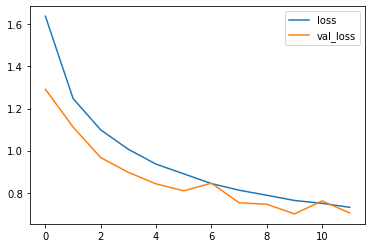

In [35]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

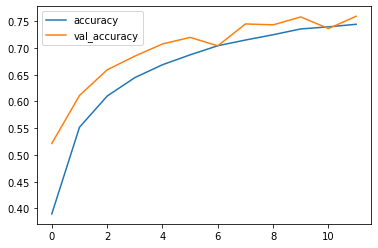

In [36]:
metrics[['accuracy','val_accuracy']].plot()

In [37]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.7039399743080139, 0.7592999935150146]

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
model.predict(x_test)

array([[1.64982118e-03, 3.21345520e-04, 2.61405343e-03, ...,
        6.09761290e-03, 5.41595137e-03, 3.24495340e-04],
       [9.86433309e-03, 3.60328734e-01, 2.11738416e-06, ...,
        1.27663313e-07, 6.26175344e-01, 3.59494286e-03],
       [6.28317893e-02, 2.83333987e-01, 5.06563170e-04, ...,
        1.20941448e-04, 5.41806757e-01, 1.09821156e-01],
       ...,
       [1.86279664e-07, 1.17558862e-07, 3.37032252e-04, ...,
        9.12639138e-04, 1.46343865e-07, 9.25755614e-07],
       [1.16432807e-03, 9.94175136e-01, 1.22712736e-04, ...,
        3.62549981e-05, 4.45510086e-05, 4.21605026e-03],
       [3.05717492e-07, 2.31758446e-10, 9.67991309e-06, ...,
        9.92293835e-01, 2.94252733e-09, 3.48957552e-09]], dtype=float32)

In [50]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [51]:
predictions

array([5, 8, 1, ..., 5, 1, 7], dtype=int64)

In [52]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1000
           1       0.75      0.82      0.78      1000
           2       0.67      0.48      0.56      1000
           3       0.44      0.56      0.49      1000
           4       0.61      0.61      0.61      1000
           5       0.55      0.62      0.58      1000
           6       0.87      0.62      0.72      1000
           7       0.70      0.76      0.73      1000
           8       0.86      0.69      0.77      1000
           9       0.67      0.81      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



In [54]:
confusion_matrix(y_test,predictions)

array([[722,  37,  40,  30,  31,  14,   3,   8,  52,  63],
       [ 16, 821,   8,  12,   2,   4,   4,   3,   8, 122],
       [ 53,  16, 476, 114, 122, 102,  30,  54,  10,  23],
       [ 18,  17,  36, 563,  61, 195,  16,  58,   8,  28],
       [ 16,   5,  44, 118, 606,  54,  28, 101,  10,  18],
       [ 14,   8,  22, 193,  40, 619,   9,  75,   2,  18],
       [  9,  17,  54, 145,  62,  56, 618,  12,   2,  25],
       [ 12,   5,  11,  60,  61,  59,   0, 761,   2,  29],
       [ 82,  78,  13,  24,  11,  10,   3,   8, 692,  79],
       [ 21,  88,   6,  24,   4,  10,   3,  14,  19, 811]], dtype=int64)

<AxesSubplot:>

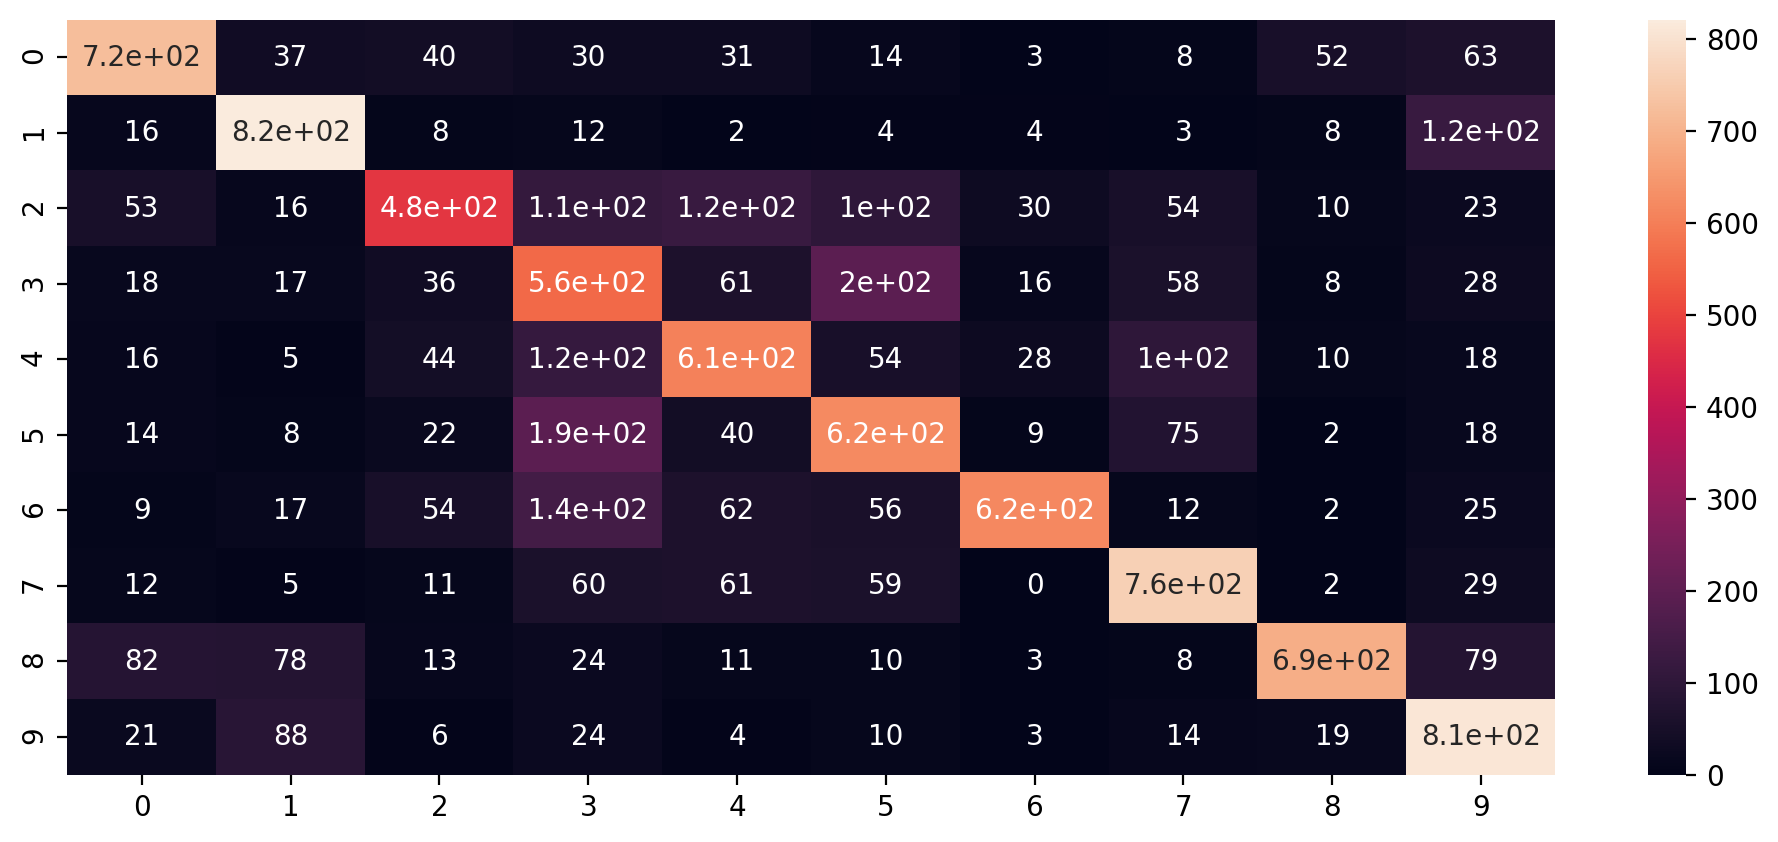

In [55]:
plt.figure(figsize=(12,5),dpi=200)
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [59]:
my_img = x_train[4]

In [60]:
my_img.shape

(32, 32, 3)

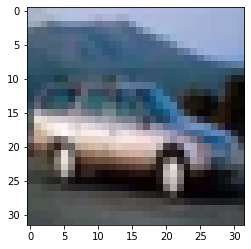

In [61]:
plt.imshow(my_img)

In [63]:
y_train[4]

array([1], dtype=uint8)

In [65]:
x_train[4].shape

(32, 32, 3)

In [67]:
np.argmax(model.predict(x_train[4].reshape(1,32,32,3)), axis=-1)

array([1], dtype=int64)